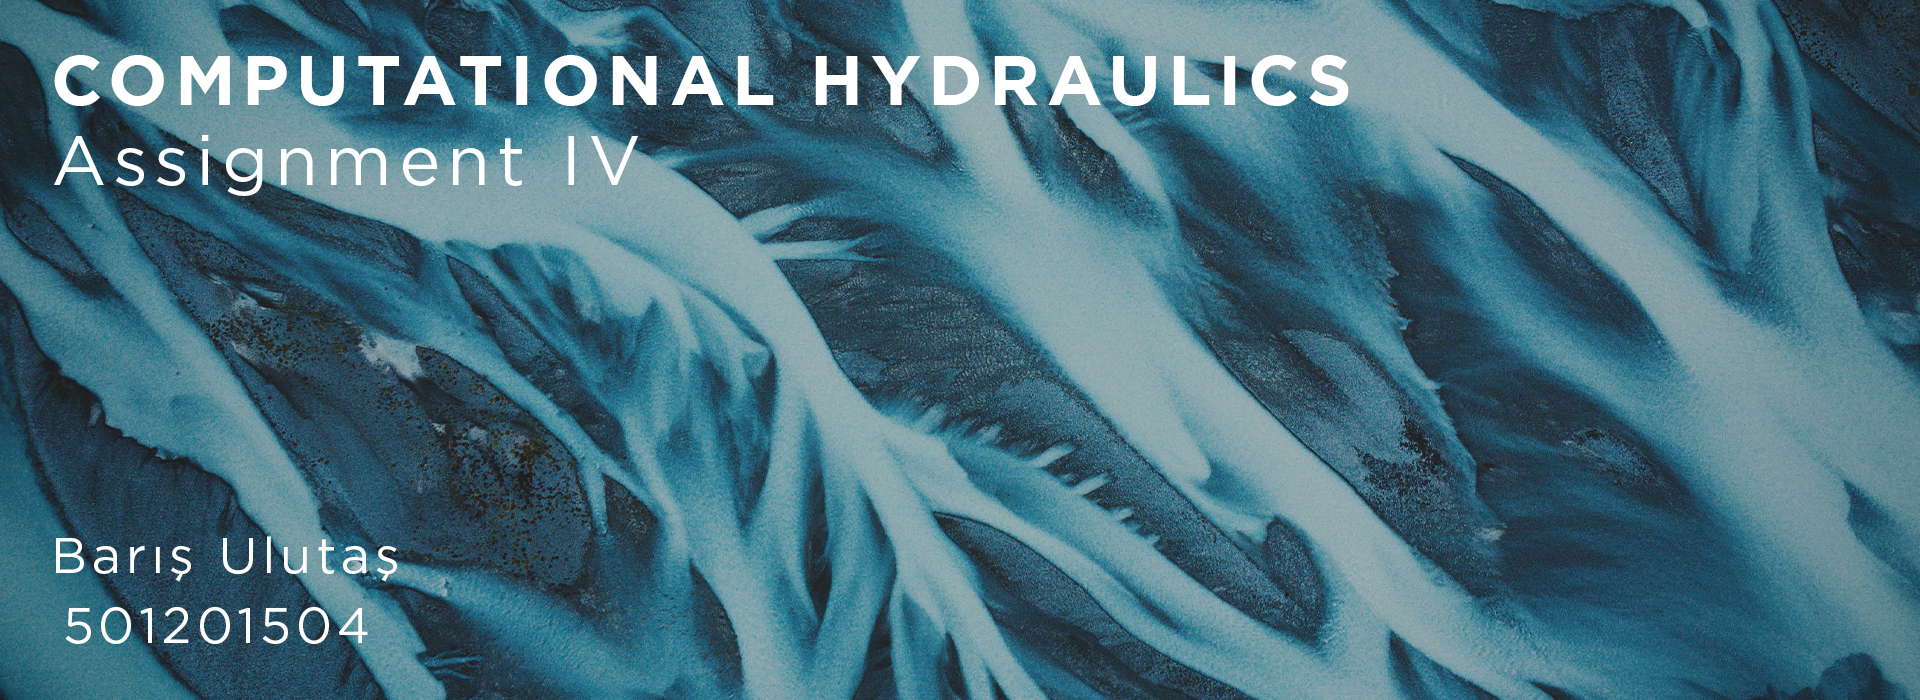

In [3]:
# Importing LİBRARY
import numpy as np   
from matplotlib import pyplot     
import time, sys                   

##The wave equation is $\frac{\partial h}{\partial t}+c\frac{\partial h}{\partial x}=0$ 
##c was accepted as $\frac{3}{2}u$.

##The manning equation is $V=\frac{1}{n} h^{2 / 3}S^{1 / 2}$

##The determined Boundary and initial conditions are implemented in the code below

##The velocity u was obtained by the manning equation as shown in the codes below.

In [4]:
# INITIAL CONDITIONS and INFORMATIONS

nx = 144   # in given datas for 450 km upstream, T=6 days (144 hours).
dx = 6     # dx set to 6 hours. almost 4% of T is choosen.
nt = 25    # number of timesteps we want to calculate
dt = .01   # choosen as 0.01 for stable solution.
S = 0.001  # slope
B = 200    # width
n = 0.035  # manning coefficient

# coefficient for manning's velocity function to calculate wave celerity.
# which is given as c = 1.5*velocity

coef = 1.5*(1/n)*(S**0.5)

# time interval for sinusoidal function.
tt = np.linspace(0,72,nx)

In [5]:
# BOUNDARY CONDITIONS
# sinusoidal function for assumption.
# which equals y = A*sin(w*t + phi)
# w is stand for 2*pi/T. T is period which is choosen. 

u = 4*np.sin(tt*2*np.pi/144)
u=u+4

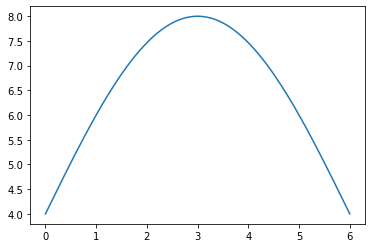

In [6]:
pyplot.plot(np.linspace(0, 6, nx), u);

##Forward in Time and Backward in Space (FTBS) Scheme is used to obtain stable solution as follows:


In [7]:

# wave celerity (c) is taken in loop as...
# ...(coef)*((un[i]**(2/3))) due to its dependency of h or Q. 

un = np.ones(nx) #initialize a temporary array
#Forward in Time and Backward in Space (FTBS) Scheme
for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
    
        u[i] = un[i] - (coef)*((un[i]**(2/3))) * dt / dx * (un[i] - un[i-1])

Text(0, 0.5, 'h(m)')

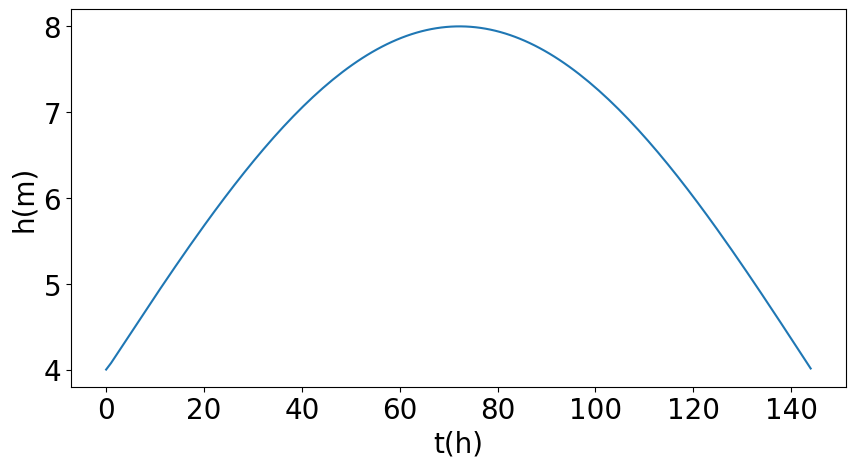

In [16]:
pyplot.figure(figsize=(10, 5), dpi=100)
pyplot.rcParams.update({'font.size': 20})
pyplot.plot(np.linspace(0, 144, nx), u);
pyplot.xlabel("t(h)")
pyplot.ylabel("h(m)")

Text(0, 0.5, 'h(m)')

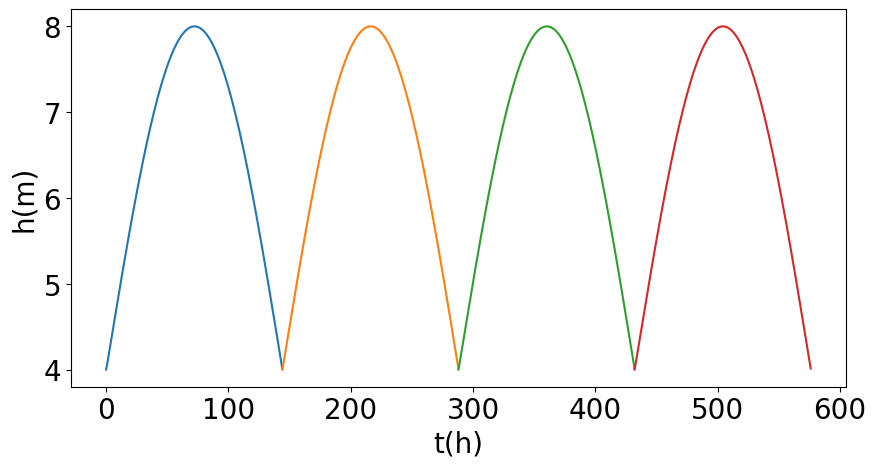

In [14]:
# Plotting the h-t graph for every 6 days.
pyplot.figure(figsize=(10, 5), dpi=100)
pyplot.rcParams.update({'font.size': 20})
pyplot.plot(np.linspace(0, 144, nx), u);
pyplot.plot(np.linspace(144, 288, nx), u);
pyplot.plot(np.linspace(288, 432, nx), u);
pyplot.plot(np.linspace(432, 576, nx), u);
pyplot.xlabel("t(h)")
pyplot.ylabel("h(m)")